In [ ]:
! nvidia-smi

Tue Jun  4 12:01:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

dataset_dir = 'drive/MyDrive/JBNU/dataset'

img_height = 224
img_width = 224

images = []
labels = []
class_names = []

for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        class_names.append(class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = Image.open(img_path).resize((img_width, img_height)).convert('RGB')
                images.append(img)
                labels.append(class_name)
            except Exception as e:
                print(f"Erreur lors du traitement de l'image {img_path}: {e}")



In [ ]:

images = np.array([np.array(img) for img in images])
labels = np.array(labels)

print(f"Nombre d'images chargées: {len(images)}")
print(f"Labels: {len(labels)}")

Nombre d'images chargées: 6603
Labels: 6603


In [ ]:
print(len(labels))
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.2, random_state=123)

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
print(f"Class names: {label_binarizer.classes_}")


6603
x_train shape: (5282, 224, 224, 3), y_train shape: (5282, 11)
x_test shape: (1321, 224, 224, 3), y_test shape: (1321, 11)
Class names: ['dew' 'fogsmog' 'frost' 'glaze' 'hail' 'lightning' 'rain' 'rainbow'
 'rime' 'sandstorm' 'snow']


In [ ]:

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (5282, 224, 224, 3)
y_train shape: (5282, 11)
x_test shape: (1321, 224, 224, 3)
y_test shape: (1321, 11)


In [ ]:
import keras

epochs = 25
batch_size = 64

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(11, activation='softmax')
])
print(model.summary())

opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

None


In [ ]:
images = []
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size= batch_size,
                    validation_split=0.20
                    )

Epoch 1/25
67/67 [==============================] - 48s 454ms/step - loss: 5.0462 - accuracy: 0.1754 - val_loss: 2.0064 - val_accuracy: 0.3198
Epoch 2/25
67/67 [==============================] - 24s 350ms/step - loss: 1.7668 - accuracy: 0.3905 - val_loss: 1.8640 - val_accuracy: 0.3548
Epoch 3/25
67/67 [==============================] - 23s 345ms/step - loss: 1.6673 - accuracy: 0.4488 - val_loss: 1.4394 - val_accuracy: 0.5279
Epoch 4/25
67/67 [==============================] - 23s 346ms/step - loss: 1.2698 - accuracy: 0.5943 - val_loss: 1.2370 - val_accuracy: 0.6112
Epoch 5/25
67/67 [==============================] - 23s 344ms/step - loss: 1.0914 - accuracy: 0.6469 - val_loss: 1.1885 - val_accuracy: 0.6112
Epoch 6/25
67/67 [==============================] - 23s 346ms/step - loss: 1.0063 - accuracy: 0.6734 - val_loss: 1.2286 - val_accuracy: 0.6036
Epoch 7/25
67/67 [==============================] - 23s 348ms/step - loss: 0.8558 - accuracy: 0.7226 - val_loss: 1.1992 - val_accuracy: 0.6206

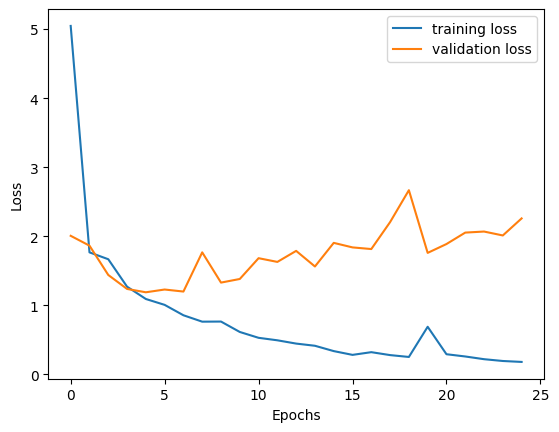

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
x_train=[]
y_train =[]
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

42/42 - 4s - loss: 1.9986 - accuracy: 0.6329 - 4s/epoch - 97ms/step

Test accuracy: 0.6328539252281189
